In [1]:
import os
homedir = os.getenv('HOME')

import numpy as np
from scipy.stats import scoreatpercentile
from astropy.visualization import simple_norm
from astropy.io import fits
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#load fits image
im = fits.getdata(homedir+'/vf_html_mask/all_input_fits/UGC09291-custom-image-r.fits')

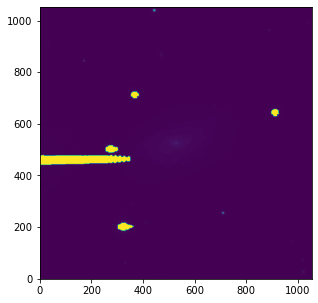

In [3]:
#display image without any 'modifications'
plt.figure(figsize=(5,5))
plt.imshow(im,'viridis',origin='lower')
plt.show()

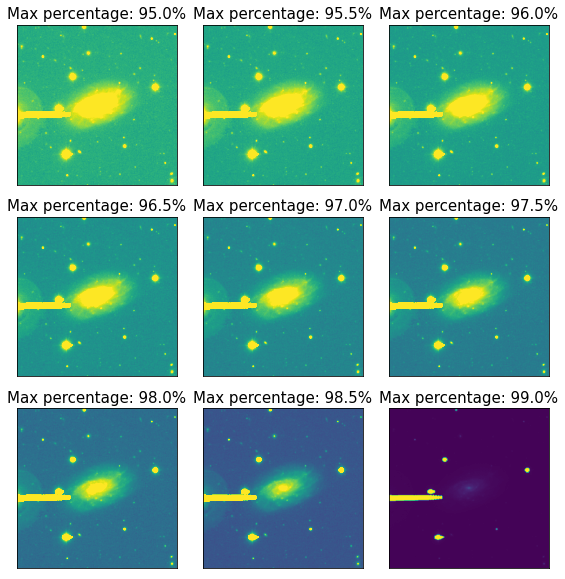

In [4]:
#the image quality is relatively poo, right? processing artifacts, bright field objects, etc.
#let's see if we can't constrict their dominion.

percentile1 = 0.5
v1 = scoreatpercentile(im,percentile1)

percentile2 = np.arange(95,101,0.5)   #creates range from 91% to 100%

fig = plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=.2,wspace=0)

for i in range(1,10):
    v2 = scoreatpercentile(im,percentile2[i-1])
    norm_test = simple_norm(im,'asinh',max_percent=percentile2[i-1],min_cut=v1,max_cut=v2)
    
    ax=fig.add_subplot(3,3,i)
    ax.imshow(im,origin='lower',norm=norm_test)
    ax.set_yticks([])
    ax.set_xticks([])
    plt.title(label=f'Max percentage: {percentile2[i-1]}%',fontsize=15)

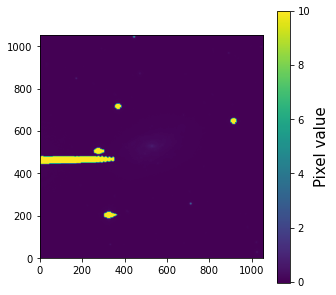

In [5]:
#in that case, at least, 99.5% for a maximum percentile is not ideal for displaying the galaxy.
#we can try instead binding the vmin and vmax values, using the colorbar...

plt.figure(figsize=(5,5))
plt.imshow(im,'viridis',origin='lower')
plt.colorbar().set_label(label='Pixel value',size=15)
plt.show()

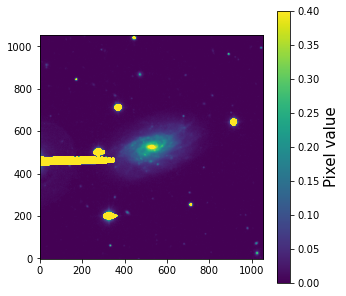

In [6]:
#The yellow is clearly dominating above. What if we tried setting the vmax to 0.4?

plt.figure(figsize=(5,5))
plt.imshow(im,'viridis',origin='lower')
plt.colorbar().set_label(label='Pixel value',size=15)
plt.clim(0,0.4)
plt.show()

In [7]:
#the yellow remains clearly yellow, but we can view the galaxy much more clearly now.

In [8]:
#Ultimately...in such cases as the above where there are prominent sources of pixels amidst a relatively
#faint central object, you might have to tweak parameters a bit to determine what is most optimal.
#I can streamline the normalization for w3 galaxies since any visible background objects (such as stars)
#tend to emit very little flux in the infrared, but r-band is more often than not in need of more monitoring.
#I suggest fiddling a bit and seeing what combinations most commonly work best for your sources!

In [9]:
#another option, at least for this particular case: only scale according to unmasked pixel values!
mask_im = fits.getdata(homedir+'/vf_html_mask/all_input_fits/UGC09291-custom-image-r-mask.fits')

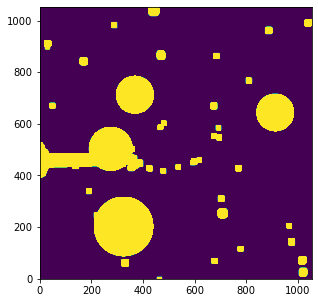

In [10]:
#display the mask
plt.figure(figsize=(5,5))
plt.imshow(mask_im,'viridis',origin='lower',vmin=0,vmax=1)
plt.show()

In [25]:
#let's create a boolean matrix for nonzero pixel values (which correspond to the mask)
mask_im_bool = ~(mask_im>0)

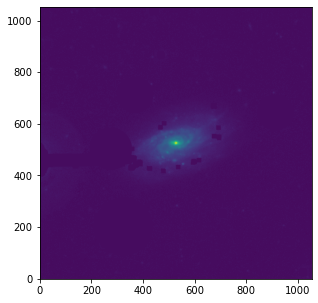

In [29]:
#display the result multiplied by the source image
plt.figure(figsize=(5,5))
plt.imshow(mask_im_bool*im,'viridis',origin='lower')
plt.show()

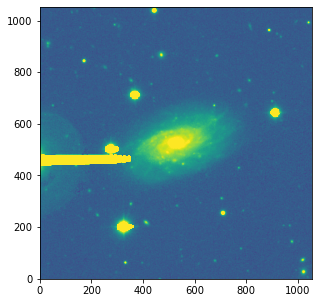

In [52]:
#noticeably, only the galaxy remains (a few SExtracted specks notwithstanding)
#now let's try to scale the image's galaxy pixels!

percentile1 = .5
v1 = scoreatpercentile(im*mask_im_bool,percentile1)
percentile2 = 99.8
v2 = scoreatpercentile(im*mask_im_bool,percentile2)
norm_test = simple_norm(im*mask_im_bool,'asinh',max_percent=percentile2,min_cut=v1,max_cut=v2)

fig = plt.figure(figsize=(5,5))
plt.imshow(im,origin='lower',norm=norm_test)

In [35]:
#not terrible. :-)